In [153]:
'''import all the necessary libraries'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from qiskit import *
from qiskit.circuit.library import ZZFeatureMap,PauliFeatureMap
from qiskit_machine_learning.kernels import QuantumKernel
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [204]:
'''Import data(csv file) using pandas library'''
data= pd.read_csv("/content/winequality-red.csv",sep=';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Exploratory Data Analysis


In [205]:
data.shape

(1599, 12)

In [206]:
''' .info() tells about data type of each columns and tell about data cotains any null value'''
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [207]:
'''(describe() tell the basic statistics about the data)'''
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [208]:
'''Tells about the unique value about each column '''
print('Number of unique value in each Columns')
for i in data.columns:
  print(i,len(data[i].unique()))

Number of unique value in each Columns
fixed acidity 96
volatile acidity 143
citric acid 80
residual sugar 91
chlorides 153
free sulfur dioxide 60
total sulfur dioxide 144
density 436
pH 89
sulphates 96
alcohol 65
quality 6


In [209]:
''' How many duplicate data contain'''
data.duplicated().sum()

240

In [210]:
''' Drop the duplicate values for cleaning the data '''
data.drop_duplicates(inplace=True)

In [211]:
data.shape

(1359, 12)

In [212]:
'''Data Correlation in the dataset '''
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.119024
volatile acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.395214
citric acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.228057
residual sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.013640
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.130988
free sulfur dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.050463
total sulfur dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.177855
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.184252
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.055245
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.248835


<function matplotlib.pyplot.show>

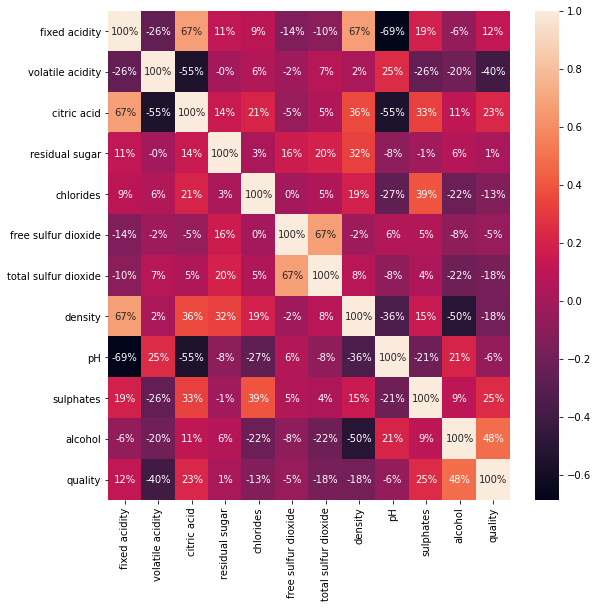

In [213]:
''' visualize the correlation in heatmap ''' 
plt.figure(figsize=([9,9]))
sns.heatmap(data.corr(),annot=True,fmt='.0%')
plt.show

Split the dataset for training


In [214]:
''' split data for test and train'''
X  =  data.iloc[:,[0,2,9,10]]
X

,fixed acidity,citric acid,sulphates,alcohol
0,7.4,0.00,0.56,9.4
1,7.8,0.00,0.68,9.8
2,7.8,0.04,0.65,9.8
3,11.2,0.56,0.58,9.8
5,7.4,0.00,0.56,9.4
...,...,...,...,...
1593,6.8,0.08,0.82,9.5
1594,6.2,0.08,0.58,10.5
1595,5.9,0.10,0.76,11.2
1597,5.9,0.12,0.71,10.2


In [215]:
Y = data.iloc[:,11]
Y

0       5
1       5
2       5
3       6
5       5
       ..
1593    6
1594    5
1595    6
1597    5
1598    6
Name: quality, Length: 1359, dtype: int64

In [216]:
''' Split the data using train test split'''
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

In [217]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1019, 4)
(340, 4)
(1019,)
(340,)


In [218]:
'''Convert pandas dataframe to numpy arrays'''
X_train = X_train.values
X_test = X_test.values
Y_train = Y_train.values
Y_test =Y_test.values

In [219]:
'''Reduce Dimensions'''
n_dim =4
pca = PCA(n_components=n_dim).fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [220]:
'''Normalise the data'''
std_scale = StandardScaler().fit(X_train)
X_train = std_scale.transform(X_train)
X_test = std_scale.transform(X_test)

In [221]:
''' Scaling the data'''
samples = np.append(X_train, X_test, axis=0)
minmax_scale = MinMaxScaler((-1, 1)).fit(samples)
X_train = minmax_scale.transform(X_train)
X_test = minmax_scale.transform(X_test)


In [222]:
''' select the train and test size'''
train_size = 1019
X_train = X_train[:train_size]
Y_train = Y_train[:train_size]

test_size = 340
X_test = X_test[:test_size]
Y_test = Y_test[:test_size]

In [223]:
print(X_train[0], Y_train[0])
print(X_test[0], Y_test[0])


[-0.45907714 -0.41748721 -0.50517012  0.26775735] 6
[-0.42047005 -0.71474428 -0.75733101 -0.16462961] 5


In [224]:
'''Data encoding into quantum'''
zz_map = ZZFeatureMap(feature_dimension=4, reps=3, entanglement='linear', insert_barriers=True)
zz_kernel = QuantumKernel(feature_map=zz_map, quantum_instance=Aer.get_backend('statevector_simulator'))

In [225]:
print(X_train[0])
print(X_train[1])

[-0.45907714 -0.41748721 -0.50517012  0.26775735]
[-0.49363026 -0.63101857 -0.74964597 -0.06268533]


In [226]:
''' draw circuit given data'''
zz_circuit = zz_kernel.construct_circuit(X_train[0], X_train[1])
zz_circuit.decompose().decompose().draw()

┌───┐ ░ ┌───────────────────────┐                                      »
q_0: ┤ H ├─░─┤ P(-0.918154280962528) ├──■───────────────────────────■───────»
     ├───┤ ░ ├───────────────────────┤┌─┴─┐┌─────────────────────┐┌─┴─┐     »
q_1: ┤ H ├─░─┤ P(-0.834974423347304) ├┤ X ├┤ P(25.6301427310811) ├┤ X ├──■──»
     ├───┤ ░ └┬──────────────────────┤└───┘└─────────────────────┘└───┘┌─┴─┐»
q_2: ┤ H ├─░──┤ P(-1.01034023495505) ├─────────────────────────────────┤ X ├»
     ├───┤ ░  ├──────────────────────┤                                 └───┘»
q_3: ┤ H ├─░──┤ P(0.535514701585918) ├──────────────────────────────────────»
     └───┘ ░  └──────────────────────┘                                      »
c: 4/═══════════════════════════════════════════════════════════════════════»
                                                                            »
«                                                                   ░ ┌───┐ ░ »
«q_0: ──────────────────────────────────────────────────────────────░─┤ H ├─░─»
«                                                                   ░ ├───┤ ░ »
«q_1: ─────────────────────────■────────────────────────────────────░─┤ H ├─░─»
«     ┌─────────────────────┐┌─┴─┐                                  ░ ├───┤ ░ »
«q_2: ┤ P(25.9582399037960) ├┤ X ├──■───────────────────────────■───░─┤ H ├─░─»
«     └─────────────────────┘└───┘┌─┴─┐┌─────────────────────┐┌─┴─┐ ░ ├───┤ ░ »
«q_3: ────────────────────────────┤ X ├┤ P(20.9603911848369) ├┤ X ├─░─┤ H ├─░─»
«                                 └───┘└─────────────────────┘└───┘ ░ └───┘ ░ »
«c: 4/════════════════════════════════════════════════════════════════════════»
«                                                                             »
«     ┌───────────────────────┐                                      »
«q_0: ┤ P(-0.918154280962528) ├──■───────────────────────────■───────»
«     ├───────────────────────┤┌─┴─┐┌─────────────────────┐┌─┴─┐     »
«q_1: ┤ P(-0.834974423347304) ├┤ X ├┤ P(25.6301427310811) ├┤ X ├──■──»
«     └┬──────────────────────┤└───┘└─────────────────────┘└───┘┌─┴─┐»
«q_2: ─┤ P(-1.01034023495505) ├─────────────────────────────────┤ X ├»
«      ├──────────────────────┤                                 └───┘»
«q_3: ─┤ P(0.535514701585918) ├──────────────────────────────────────»
«      └──────────────────────┘                                      »
«c: 4/═══════════════════════════════════════════════════════════════»
«                                                                    »
«                                                                   ░ ┌───┐ ░ »
«q_0: ──────────────────────────────────────────────────────────────░─┤ H ├─░─»
«                                                                   ░ ├───┤ ░ »
«q_1: ─────────────────────────■────────────────────────────────────░─┤ H ├─░─»
«     ┌─────────────────────┐┌─┴─┐                                  ░ ├───┤ ░ »
«q_2: ┤ P(25.9582399037960) ├┤ X ├──■───────────────────────────■───░─┤ H ├─░─»
«     └─────────────────────┘└───┘┌─┴─┐┌─────────────────────┐┌─┴─┐ ░ ├───┤ ░ »
«q_3: ────────────────────────────┤ X ├┤ P(20.9603911848369) ├┤ X ├─░─┤ H ├─░─»
«                                 └───┘└─────────────────────┘└───┘ ░ └───┘ ░ »
«c: 4/════════════════════════════════════════════════════════════════════════»
«                                                                             »
«     ┌───────────────────────┐                                      »
«q_0: ┤ P(-0.918154280962528) ├──■───────────────────────────■───────»
«     ├───────────────────────┤┌─┴─┐┌─────────────────────┐┌─┴─┐     »
«q_1: ┤ P(-0.834974423347304) ├┤ X ├┤ P(25.6301427310811) ├┤ X ├──■──»
«     └┬──────────────────────┤└───┘└─────────────────────┘└───┘┌─┴─┐»
«q_2: ─┤ P(-1.01034023495505) ├─────────────────────────────────┤ X ├»
«      ├──────────────────────┤                                 └───┘»
«q_3: ─┤ P(0.535514701585918) ├──────────────────────────────────────»
«      └──────────────────────┘       

In [227]:
'''compute the kernel matrices'''
matrix_train = zz_kernel.evaluate(x_vec=X_train)
matrix_test = zz_kernel.evaluate(x_vec=X_test, y_vec=X_train)

In [228]:
matrix_test.shape

(340, 1019)

In [229]:
matrix_train.shape

(1019, 1019)

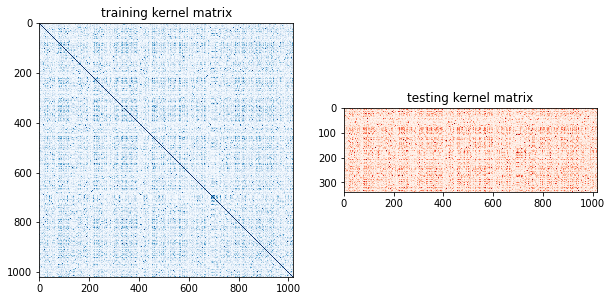

In [230]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(np.asmatrix(matrix_train),
              interpolation='nearest', origin='upper', cmap='Blues')
axs[0].set_title("training kernel matrix")
axs[1].imshow(np.asmatrix(matrix_test),
              interpolation='nearest', origin='upper', cmap='Reds')
axs[1].set_title("testing kernel matrix")
plt.show()

In [231]:
backend = Aer.get_backend('qasm_simulator')
job = execute(zz_circuit, backend, shots=8192, 
              seed_simulator=1024, seed_transpiler=1024)
counts = job.result().get_counts(zz_circuit)

In [246]:
model = SVC(kernel='precomputed')
model.fit(matrix_train, Y_train)
score = model.score(matrix_test, Y_test)

print(f'Precomputed kernel classification test  Accuracy score: {score}')

Precomputed kernel classification test  Accuracy score: 0.5147058823529411


In [233]:
classical_kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in classical_kernels:
    classical_svc = SVC(kernel=kernel)
    classical_svc.fit(X_train, Y_train)
    classical_score = classical_svc.score(X_test, Y_test)

    print('%s kernel classification test score:  %0.2f' % (kernel, classical_score))

linear kernel classification test score:  0.58
poly kernel classification test score:  0.59
rbf kernel classification test score:  0.61
sigmoid kernel classification test score:  0.27


In [235]:
TP = np.diag(Y_test)
TP

array([[5, 0, 0, ..., 0, 0, 0],
       [0, 6, 0, ..., 0, 0, 0],
       [0, 0, 7, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 6, 0, 0],
       [0, 0, 0, ..., 0, 7, 0],
       [0, 0, 0, ..., 0, 0, 6]])

In [236]:
FP = np.sum(Y_test, axis=0) - TP
FP

array([[1898, 1903, 1903, ..., 1903, 1903, 1903],
       [1903, 1897, 1903, ..., 1903, 1903, 1903],
       [1903, 1903, 1896, ..., 1903, 1903, 1903],
       ...,
       [1903, 1903, 1903, ..., 1897, 1903, 1903],
       [1903, 1903, 1903, ..., 1903, 1896, 1903],
       [1903, 1903, 1903, ..., 1903, 1903, 1897]])

In [241]:
FN = np.sum(Y_test - TP)
FN

645117

In [242]:
precision = TP/(TP+FP)

In [243]:
precision

array([[0.00262743, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00315292, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.0036784 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.00315292, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.0036784 ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00315292]])

In [245]:
recall = TP/(TP+FN)
recall

array([[7.75047200e-06, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 9.30055199e-06, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.08506272e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        9.30055199e-06, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.08506272e-05, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 9.30055199e-06]])